In [64]:
!pip install tensorflow
!pip install utils

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline


In [3]:
# importing the dataset
df = pd.read_csv("/content/house_data.csv")

In [4]:
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [5]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [6]:
df.shape

(5000, 7)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

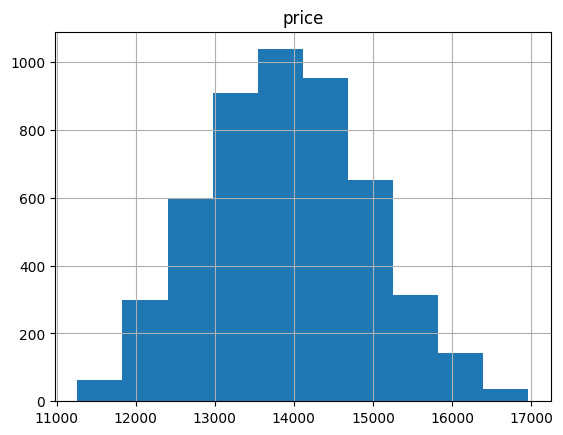

In [7]:
df.hist('price')

In [8]:
# checking for the missing values
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   date       5000 non-null   int64
 1   age        5000 non-null   int64
 2   distance   5000 non-null   int64
 3   stores     5000 non-null   int64
 4   latitude   5000 non-null   int64
 5   longitude  5000 non-null   int64
 6   price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [10]:
# Data Normalization
df  = df.iloc[:,1:]
df_norm = (df-df.mean())/df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [11]:
# Selecting the X labels
X= df_norm.iloc[:, :5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [12]:
# Select Y labels:
Y = df_norm.iloc[:,-1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [13]:
X_arr = X.values
Y_arr = Y.values

In [14]:
# Train and Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state = 1)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (4950, 5)
X_test shape:  (50, 5)
Y_train shape:  (4950,)
Y_test shape:  (50,)


In [15]:
# create a model
def get_model():
  model = Sequential([
      Dense(10,input_shape = (5,), activation = 'relu'),
      Dense(20, activation = 'relu'),
      Dense(5, activation = 'relu'),
      Dense(1)
  ])

  model.compile(
      loss = 'mse',
      optimizer = 'adadelta'
  )
  return model

In [46]:
model = get_model()
preds_on_untrained  = model.predict(X_test)
model.summary()


2/2 [==============================] - 0s 9ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 5)                 105       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# train the model and store it in the object history!
history = model.fit(
    X_train, Y_train, validation_data = (X_test, Y_test), epochs = 1000
)

Epoch 1/1000
155/155 [==============================] - 2s 4ms/step - loss: 0.9724 - val_loss: 0.6178
Epoch 2/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.9697 - val_loss: 0.6157
Epoch 3/1000
155/155 [==============================] - 1s 4ms/step - loss: 0.9671 - val_loss: 0.6135
Epoch 4/1000
155/155 [==============================] - 1s 5ms/step - loss: 0.9644 - val_loss: 0.6114
Epoch 5/1000
155/155 [==============================] - 1s 5ms/step - loss: 0.9617 - val_loss: 0.6092
Epoch 6/1000
155/155 [==============================] - 1s 6ms/step - loss: 0.9589 - val_loss: 0.6070
Epoch 7/1000
155/155 [==============================] - 1s 6ms/step - loss: 0.9562 - val_loss: 0.6049
Epoch 8/1000
155/155 [==============================] - 1s 9ms/step - loss: 0.9535 - val_loss: 0.6028
Epoch 9/1000
155/155 [==============================] - 1s 4ms/step - loss: 0.9507 - val_loss: 0.6007
Epoch 10/1000
155/155 [==============================] - 1s 4ms/step - loss: 0.947

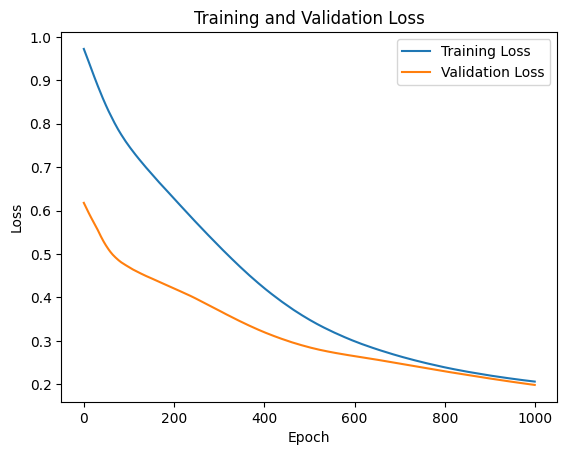

In [29]:
# plot history
loss_values = history.history['loss']

# # Plotting the loss
# plt.plot(loss_values)
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()
# plot training and validation loss
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Plotting the training loss
plt.plot(loss_values, label='Training Loss')

# Plotting the validation loss
plt.plot(val_loss_values, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# make predictions on the trained model
preds_on_trained = model.predict(X_test)


2/2 [==============================] - 0s 7ms/step


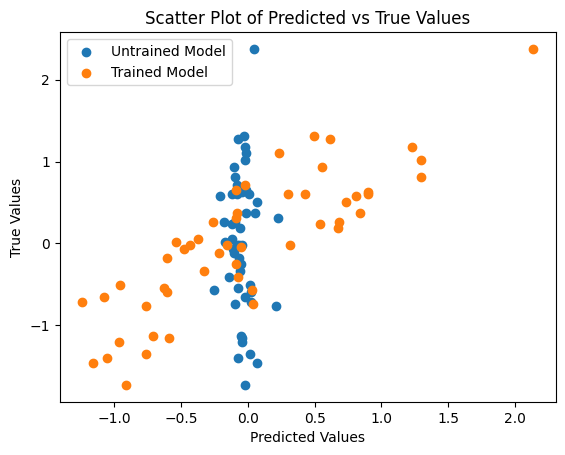

In [63]:

# Create scatter plots
plt.scatter(preds_on_untrained, Y_test, label='Untrained Model')
plt.scatter(preds_on_trained, Y_test, label='Trained Model')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs True Values')
plt.legend()

# Show the plot
plt.show()
